<a href="https://colab.research.google.com/github/chrislopez630/DS-Unit-1-Build-aster.github.io/blob/master/chrislopez/Build_week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##My main look was to see the amount of races incarcerated in the years and see which race incarceration goes higher within the years but my dataset does not let me check the years when I try to look for years 

Student research question is concise, direct, and practical. Student can communicate their main findings in 1-2 sentences. Student potentially had to alter their course on the projects based on the problem and the data, these learnings are documented and articulated by the project.


##Loading Dataset onto data frame



In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/chrislopez630/DS-Unit-1-Build-aster.github.io/master/daily-inmates-in-custody.csv')

In [2]:
df.head()

,INMATEID,ADMITTED_DT,DISCHARGED_DT,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,INMATE_STATUS_CODE,SEALED,SRG_FLG,TOP_CHARGE,INFRACTION
0,152258,2018-08-24T01:46:33.000,NaN,MIN,Y,W,M,54.0,DE,N,N,140.25,N
1,89404,2019-10-16T11:06:07.000,NaN,MAX,N,B,M,29.0,DEP,N,Y,120.14,N
2,7049,2019-11-10T02:32:10.000,NaN,MAX,N,B,M,38.0,DEP,N,N,140.15,N
3,20207729,2019-10-23T03:26:50.000,NaN,MIN,N,W,M,29.0,CS,N,N,156.10,N
4,20203998,2019-05-02T01:35:22.000,NaN,MAX,Y,B,M,27.0,DE,N,N,125.25,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INMATEID            6818 non-null   int64  
 1   ADMITTED_DT         6818 non-null   object 
 2   DISCHARGED_DT       0 non-null      float64
 3   CUSTODY_LEVEL       6703 non-null   object 
 4   BRADH               6818 non-null   object 
 5   RACE                6789 non-null   object 
 6   GENDER              6789 non-null   object 
 7   AGE                 6805 non-null   float64
 8   INMATE_STATUS_CODE  6818 non-null   object 
 9   SEALED              6818 non-null   object 
 10  SRG_FLG             6818 non-null   object 
 11  TOP_CHARGE          5795 non-null   object 
 12  INFRACTION          6818 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 692.6+ KB


In [4]:
df['admitted'] = pd.to_datetime(df['ADMITTED_DT'])

In [5]:
df['year'] = df['admitted'].dt.year
df.head()

,INMATEID,ADMITTED_DT,DISCHARGED_DT,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,INMATE_STATUS_CODE,SEALED,SRG_FLG,TOP_CHARGE,INFRACTION,admitted,year
0,152258,2018-08-24T01:46:33.000,NaN,MIN,Y,W,M,54.0,DE,N,N,140.25,N,2018-08-24 01:46:33,2018
1,89404,2019-10-16T11:06:07.000,NaN,MAX,N,B,M,29.0,DEP,N,Y,120.14,N,2019-10-16 11:06:07,2019
2,7049,2019-11-10T02:32:10.000,NaN,MAX,N,B,M,38.0,DEP,N,N,140.15,N,2019-11-10 02:32:10,2019
3,20207729,2019-10-23T03:26:50.000,NaN,MIN,N,W,M,29.0,CS,N,N,156.10,N,2019-10-23 03:26:50,2019
4,20203998,2019-05-02T01:35:22.000,NaN,MAX,Y,B,M,27.0,DE,N,N,125.25,Y,2019-05-02 01:35:22,2019


##deleting unwated columns (inmate ID, inmate status code, and top charge)

In [6]:
del df['ADMITTED_DT']

In [7]:
df

,INMATEID,DISCHARGED_DT,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,INMATE_STATUS_CODE,SEALED,SRG_FLG,TOP_CHARGE,INFRACTION,admitted,year
0,152258,NaN,MIN,Y,W,M,54.0,DE,N,N,140.25,N,2018-08-24 01:46:33,2018
1,89404,NaN,MAX,N,B,M,29.0,DEP,N,Y,120.14,N,2019-10-16 11:06:07,2019
2,7049,NaN,MAX,N,B,M,38.0,DEP,N,N,140.15,N,2019-11-10 02:32:10,2019
3,20207729,NaN,MIN,N,W,M,29.0,CS,N,N,156.10,N,2019-10-23 03:26:50,2019
4,20203998,NaN,MAX,Y,B,M,27.0,DE,N,N,125.25,Y,2019-05-02 01:35:22,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,19225,NaN,MED,Y,B,M,43.0,DE,N,N,125.25,N,2017-02-03 21:36:59,2017
6814,20093747,NaN,MAX,Y,B,M,46.0,DE,N,N,110-125.25,N,2018-11-14 01:38:36,2018
6815,93606,NaN,MAX,Y,B,M,35.0,DE,N,Y,110-125.25,Y,2018-01-22 23:57:24,2018
6816,14481,NaN,MED,N,W,M,40.0,DE,N,N,130.96,N,2017-08-23 17:21:51,2017


In [8]:
del df['INMATE_STATUS_CODE']

In [9]:
df

,INMATEID,DISCHARGED_DT,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,SEALED,SRG_FLG,TOP_CHARGE,INFRACTION,admitted,year
0,152258,NaN,MIN,Y,W,M,54.0,N,N,140.25,N,2018-08-24 01:46:33,2018
1,89404,NaN,MAX,N,B,M,29.0,N,Y,120.14,N,2019-10-16 11:06:07,2019
2,7049,NaN,MAX,N,B,M,38.0,N,N,140.15,N,2019-11-10 02:32:10,2019
3,20207729,NaN,MIN,N,W,M,29.0,N,N,156.10,N,2019-10-23 03:26:50,2019
4,20203998,NaN,MAX,Y,B,M,27.0,N,N,125.25,Y,2019-05-02 01:35:22,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,19225,NaN,MED,Y,B,M,43.0,N,N,125.25,N,2017-02-03 21:36:59,2017
6814,20093747,NaN,MAX,Y,B,M,46.0,N,N,110-125.25,N,2018-11-14 01:38:36,2018
6815,93606,NaN,MAX,Y,B,M,35.0,N,Y,110-125.25,Y,2018-01-22 23:57:24,2018
6816,14481,NaN,MED,N,W,M,40.0,N,N,130.96,N,2017-08-23 17:21:51,2017


In [10]:
del df['SRG_FLG']

In [11]:
df

,INMATEID,DISCHARGED_DT,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,SEALED,TOP_CHARGE,INFRACTION,admitted,year
0,152258,NaN,MIN,Y,W,M,54.0,N,140.25,N,2018-08-24 01:46:33,2018
1,89404,NaN,MAX,N,B,M,29.0,N,120.14,N,2019-10-16 11:06:07,2019
2,7049,NaN,MAX,N,B,M,38.0,N,140.15,N,2019-11-10 02:32:10,2019
3,20207729,NaN,MIN,N,W,M,29.0,N,156.10,N,2019-10-23 03:26:50,2019
4,20203998,NaN,MAX,Y,B,M,27.0,N,125.25,Y,2019-05-02 01:35:22,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
6813,19225,NaN,MED,Y,B,M,43.0,N,125.25,N,2017-02-03 21:36:59,2017
6814,20093747,NaN,MAX,Y,B,M,46.0,N,110-125.25,N,2018-11-14 01:38:36,2018
6815,93606,NaN,MAX,Y,B,M,35.0,N,110-125.25,Y,2018-01-22 23:57:24,2018
6816,14481,NaN,MED,N,W,M,40.0,N,130.96,N,2017-08-23 17:21:51,2017


In [12]:
del df['INFRACTION']

In [13]:
df

,INMATEID,DISCHARGED_DT,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,SEALED,TOP_CHARGE,admitted,year
0,152258,NaN,MIN,Y,W,M,54.0,N,140.25,2018-08-24 01:46:33,2018
1,89404,NaN,MAX,N,B,M,29.0,N,120.14,2019-10-16 11:06:07,2019
2,7049,NaN,MAX,N,B,M,38.0,N,140.15,2019-11-10 02:32:10,2019
3,20207729,NaN,MIN,N,W,M,29.0,N,156.10,2019-10-23 03:26:50,2019
4,20203998,NaN,MAX,Y,B,M,27.0,N,125.25,2019-05-02 01:35:22,2019
...,...,...,...,...,...,...,...,...,...,...,...
6813,19225,NaN,MED,Y,B,M,43.0,N,125.25,2017-02-03 21:36:59,2017
6814,20093747,NaN,MAX,Y,B,M,46.0,N,110-125.25,2018-11-14 01:38:36,2018
6815,93606,NaN,MAX,Y,B,M,35.0,N,110-125.25,2018-01-22 23:57:24,2018
6816,14481,NaN,MED,N,W,M,40.0,N,130.96,2017-08-23 17:21:51,2017


In [14]:
del df['DISCHARGED_DT']

In [15]:
df

,INMATEID,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,SEALED,TOP_CHARGE,admitted,year
0,152258,MIN,Y,W,M,54.0,N,140.25,2018-08-24 01:46:33,2018
1,89404,MAX,N,B,M,29.0,N,120.14,2019-10-16 11:06:07,2019
2,7049,MAX,N,B,M,38.0,N,140.15,2019-11-10 02:32:10,2019
3,20207729,MIN,N,W,M,29.0,N,156.10,2019-10-23 03:26:50,2019
4,20203998,MAX,Y,B,M,27.0,N,125.25,2019-05-02 01:35:22,2019
...,...,...,...,...,...,...,...,...,...,...
6813,19225,MED,Y,B,M,43.0,N,125.25,2017-02-03 21:36:59,2017
6814,20093747,MAX,Y,B,M,46.0,N,110-125.25,2018-11-14 01:38:36,2018
6815,93606,MAX,Y,B,M,35.0,N,110-125.25,2018-01-22 23:57:24,2018
6816,14481,MED,N,W,M,40.0,N,130.96,2017-08-23 17:21:51,2017


In [16]:
del df['INMATEID']

In [17]:
df

,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,SEALED,TOP_CHARGE,admitted,year
0,MIN,Y,W,M,54.0,N,140.25,2018-08-24 01:46:33,2018
1,MAX,N,B,M,29.0,N,120.14,2019-10-16 11:06:07,2019
2,MAX,N,B,M,38.0,N,140.15,2019-11-10 02:32:10,2019
3,MIN,N,W,M,29.0,N,156.10,2019-10-23 03:26:50,2019
4,MAX,Y,B,M,27.0,N,125.25,2019-05-02 01:35:22,2019
...,...,...,...,...,...,...,...,...,...
6813,MED,Y,B,M,43.0,N,125.25,2017-02-03 21:36:59,2017
6814,MAX,Y,B,M,46.0,N,110-125.25,2018-11-14 01:38:36,2018
6815,MAX,Y,B,M,35.0,N,110-125.25,2018-01-22 23:57:24,2018
6816,MED,N,W,M,40.0,N,130.96,2017-08-23 17:21:51,2017


In [18]:
del df['SEALED']

In [19]:
df

,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,TOP_CHARGE,admitted,year
0,MIN,Y,W,M,54.0,140.25,2018-08-24 01:46:33,2018
1,MAX,N,B,M,29.0,120.14,2019-10-16 11:06:07,2019
2,MAX,N,B,M,38.0,140.15,2019-11-10 02:32:10,2019
3,MIN,N,W,M,29.0,156.10,2019-10-23 03:26:50,2019
4,MAX,Y,B,M,27.0,125.25,2019-05-02 01:35:22,2019
...,...,...,...,...,...,...,...,...
6813,MED,Y,B,M,43.0,125.25,2017-02-03 21:36:59,2017
6814,MAX,Y,B,M,46.0,110-125.25,2018-11-14 01:38:36,2018
6815,MAX,Y,B,M,35.0,110-125.25,2018-01-22 23:57:24,2018
6816,MED,N,W,M,40.0,130.96,2017-08-23 17:21:51,2017


##Finding the races and value counts

In [20]:
df['RACE'].value_counts()

B    3845
O    2082
W     729
A     106
I      14
U      13
Name: RACE, dtype: int64

In [21]:
df['GENDER'].value_counts()

M    6420
F     369
Name: GENDER, dtype: int64

In [22]:
df['AGE'].value_counts()

29.0    268
28.0    258
27.0    256
30.0    246
32.0    238
       ... 
77.0      2
82.0      2
78.0      1
90.0      1
75.0      1
Name: AGE, Length: 63, dtype: int64

In [23]:
df['year'].value_counts()

2019    5584
2018     933
2017     218
2016      62
2015      14
2014       2
2013       2
2012       2
1991       1
Name: year, dtype: int64

##checking for any null values

In [24]:
df.isnull().sum()

CUSTODY_LEVEL     115
BRADH               0
RACE               29
GENDER             29
AGE                13
TOP_CHARGE       1023
admitted            0
year                0
dtype: int64

In [25]:
df["GENDER"] = df["GENDER"].fillna(0)

In [26]:
df.isnull().sum()

CUSTODY_LEVEL     115
BRADH               0
RACE               29
GENDER              0
AGE                13
TOP_CHARGE       1023
admitted            0
year                0
dtype: int64

In [27]:
df["RACE"] = df["RACE"].fillna(0)

In [28]:
df.isnull().sum()

CUSTODY_LEVEL     115
BRADH               0
RACE                0
GENDER              0
AGE                13
TOP_CHARGE       1023
admitted            0
year                0
dtype: int64

In [29]:
df["AGE"] = df["AGE"].fillna(0)

In [30]:
df.isnull().sum()

CUSTODY_LEVEL     115
BRADH               0
RACE                0
GENDER              0
AGE                 0
TOP_CHARGE       1023
admitted            0
year                0
dtype: int64

##scatter plotting by age
##after scatter plotting age i come to the conclusion that around the age of 29 was the highest amount of incarceration.

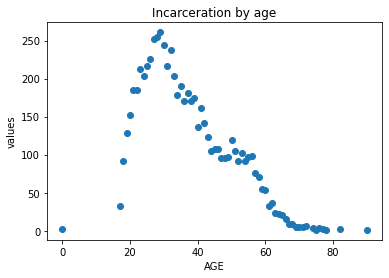

In [31]:
import matplotlib.pyplot as plt

age_sort = df.groupby('AGE').count().reset_index()
age_x = age_sort.iloc[:,0]
age_y = age_sort.iloc[:,1]
data = [plt.scatter(x=age_x, y=age_y)]

plt.title('Incarceration by age')
plt.xlabel('AGE')
plt.ylabel('values')
plt;

In [32]:
age_race = df.groupby(['AGE','RACE']).count().reset_index()
age_race_pivot = age_race.pivot(columns="RACE", index="AGE").reset_index()
print("age_race_pivot \n", age_race_pivot.head())

age_race_pivot 
        AGE CUSTODY_LEVEL                       ... year                          
RACE                   0    A     B   I     O  ...    A     B   I     O    U    W
0      0.0           2.0  NaN   NaN NaN   NaN  ...  NaN   NaN NaN   NaN  NaN  NaN
1     17.0           NaN  NaN  21.0 NaN  10.0  ...  NaN  26.0 NaN  11.0  NaN  1.0
2     18.0           NaN  NaN  69.0 NaN  16.0  ...  NaN  70.0 NaN  17.0  NaN  6.0
3     19.0           NaN  2.0  84.0 NaN  40.0  ...  2.0  85.0 NaN  41.0  NaN  2.0
4     20.0           NaN  2.0  94.0 NaN  50.0  ...  2.0  96.0 NaN  51.0  1.0  5.0

[5 rows x 43 columns]


In [33]:
df['GENDER'] = df['GENDER'].replace(['F','M'],[0,1])
df.head()

,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,TOP_CHARGE,admitted,year
0,MIN,Y,W,1,54.0,140.25,2018-08-24 01:46:33,2018
1,MAX,N,B,1,29.0,120.14,2019-10-16 11:06:07,2019
2,MAX,N,B,1,38.0,140.15,2019-11-10 02:32:10,2019
3,MIN,N,W,1,29.0,156.10,2019-10-23 03:26:50,2019
4,MAX,Y,B,1,27.0,125.25,2019-05-02 01:35:22,2019


In [34]:
df.head()

,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,TOP_CHARGE,admitted,year
0,MIN,Y,W,1,54.0,140.25,2018-08-24 01:46:33,2018
1,MAX,N,B,1,29.0,120.14,2019-10-16 11:06:07,2019
2,MAX,N,B,1,38.0,140.15,2019-11-10 02:32:10,2019
3,MIN,N,W,1,29.0,156.10,2019-10-23 03:26:50,2019
4,MAX,Y,B,1,27.0,125.25,2019-05-02 01:35:22,2019


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CUSTODY_LEVEL  6703 non-null   object        
 1   BRADH          6818 non-null   object        
 2   RACE           6818 non-null   object        
 3   GENDER         6818 non-null   int64         
 4   AGE            6818 non-null   float64       
 5   TOP_CHARGE     5795 non-null   object        
 6   admitted       6818 non-null   datetime64[ns]
 7   year           6818 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 426.2+ KB


In [36]:
df['GENDER'] = df['GENDER'].astype(int)
df

,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,TOP_CHARGE,admitted,year
0,MIN,Y,W,1,54.0,140.25,2018-08-24 01:46:33,2018
1,MAX,N,B,1,29.0,120.14,2019-10-16 11:06:07,2019
2,MAX,N,B,1,38.0,140.15,2019-11-10 02:32:10,2019
3,MIN,N,W,1,29.0,156.10,2019-10-23 03:26:50,2019
4,MAX,Y,B,1,27.0,125.25,2019-05-02 01:35:22,2019
...,...,...,...,...,...,...,...,...
6813,MED,Y,B,1,43.0,125.25,2017-02-03 21:36:59,2017
6814,MAX,Y,B,1,46.0,110-125.25,2018-11-14 01:38:36,2018
6815,MAX,Y,B,1,35.0,110-125.25,2018-01-22 23:57:24,2018
6816,MED,N,W,1,40.0,130.96,2017-08-23 17:21:51,2017


## made a bar chart to see if the yearly arrest rate has been higher over the years which came out true 

In [40]:
df['year'].value_counts()

2019    5584
2018     933
2017     218
2016      62
2015      14
2014       2
2013       2
2012       2
1991       1
Name: year, dtype: int64

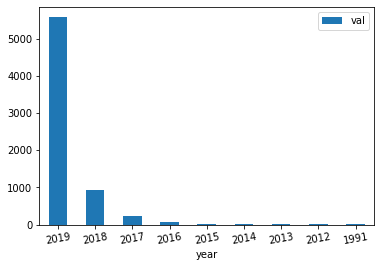

In [69]:
df = pd.DataFrame({'year':["2019", "2018", "2017", "2016", "2015", "2014", "2013", "2012", "1991"], 'val':[5584, 933, 218, 62, 14, 2, 2, 2, 1]})
ax = df.plot.bar(x='year', y='val', rot=10)